In [39]:
# Necessary import statements:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

Read the data and set the training and testing sets


In [40]:
tesla_df = pd.read_csv("TSLA.csv")

Split the tesla stock in half for training and testing sets

In [41]:
training_set = tesla_df.iloc[:800, 1:2].values
test_set = tesla_df.iloc[800:, 1:2].values

Normalize data using a MinMax Scaler: Transforms all values into a range between 0 and 1. Minimizes bias

In [42]:
min_max_scaler = MinMaxScaler()
normalized_training_set = min_max_scaler.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(normalized_training_set[i-50:i, 0])
    y_train.append(normalized_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Train the training set

In [24]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')


model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 94ms/step - loss: 0.1409
Epoch 2/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0187
Epoch 3/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0145
Epoch 4/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0156
Epoch 5/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0115
Epoch 6/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0112
Epoch 7/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0129
Epoch 8/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0115
Epoch 9/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0114
Epoch 10/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0102
Epoch 11/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0100
Epoch 12/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0115
Epoch 13/100
2

Make predictions

In [36]:
dataset_train = tesla_df.iloc[:800, 1:2]
dataset_test = tesla_df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = min_max_scaler.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)

Graph the model

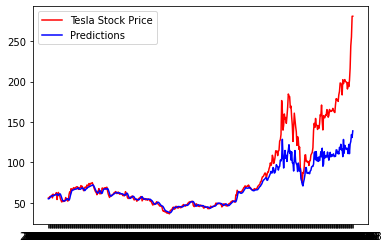

In [38]:
plt.plot(tesla_df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Tesla Stock Price')
plt.plot(tesla_df.loc[800:, 'Date'],predictions, color = 'blue', label = 'Predictions')
plt.legend()
plt.show()